In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [60]:
sim1 = pd.read_csv('/home/rute/Pesquisa/newData/simout_1.csv')
sim1.head()

,tout,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
0,0.01,0.27103,3649.7,4451.3,9.2231,32.393,47.560,2799.0,64.996,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
1,0.02,0.27185,3689.3,4444.5,9.2526,32.181,47.771,2799.1,64.358,122.89,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
2,0.03,0.27124,3645.2,4444.6,9.2110,32.627,47.649,2799.0,63.644,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
3,0.04,0.27062,3653.2,4459.6,9.3142,32.493,47.579,2798.6,64.830,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
4,0.05,0.27134,3668.2,4486.7,9.2479,32.295,47.595,2799.2,64.585,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986


In [11]:
def sig_corr(x1, x2, wlag, t_amostragem):
    correlations = np.zeros(wlag)
    for i in np.arange(0, wlag):
        correlations[i] = (1/(len(x1) - i))*np.dot(x1[i:],x2[:(len(x2) - i)])
    return np.array([(np.argmax(correlations))*t_amostragem, np.max(correlations)])

In [18]:
sig_corr(np.array([1,3,4]), np.array([1,3,4]), 2, 0.01)

array([ 0.        ,  8.66666667])

In [225]:
def normalize_dfs(dfs):
    all_dfs = pd.concat(dfs)
    norm_dfs = []
    all_dfs_norm =  (all_dfs - all_dfs.mean())/all_dfs.std()
    
    num_blocks = int(len(all_dfs)/len(dfs)) 
    for i in np.arange(0, num_blocks):
        df = all_dfs.iloc[(i*num_blocks) : (i*num_blocks + num_blocks),:]
        norm_dfs.append(df)
    return norm_dfs
        

In [228]:
teste = sim1.loc[:5]
teste1 = sim1.loc[5:10,:]
a = pd.concat([teste, teste1])
s = int(len(a)/2)
a.iloc[:2*(s-1)]

,tout,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
0,0.01,0.27103,3649.7,4451.3,9.2231,32.393,47.560,2799.0,64.996,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
1,0.02,0.27185,3689.3,4444.5,9.2526,32.181,47.771,2799.1,64.358,122.89,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
2,0.03,0.27124,3645.2,4444.6,9.2110,32.627,47.649,2799.0,63.644,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
3,0.04,0.27062,3653.2,4459.6,9.3142,32.493,47.579,2798.6,64.830,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
4,0.05,0.27134,3668.2,4486.7,9.2479,32.295,47.595,2799.2,64.585,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
5,0.06,0.26962,3661.5,4466.0,9.3087,32.244,47.277,2799.3,64.402,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
5,0.06,0.26962,3661.5,4466.0,9.3087,32.244,47.277,2799.3,64.402,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
6,0.07,0.26912,3643.1,4452.2,9.1968,32.538,47.499,2798.8,65.285,122.88,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
7,0.08,0.27180,3654.7,4436.2,9.2482,32.364,47.382,2799.0,65.087,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
8,0.09,0.27208,3620.2,4482.8,9.1223,32.635,47.557,2799.0,64.709,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986


In [229]:
teste1

,tout,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
5,0.06,0.26962,3661.5,4466.0,9.3087,32.244,47.277,2799.3,64.402,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
6,0.07,0.26912,3643.1,4452.2,9.1968,32.538,47.499,2798.8,65.285,122.88,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
7,0.08,0.27180,3654.7,4436.2,9.2482,32.364,47.382,2799.0,65.087,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
8,0.09,0.27208,3620.2,4482.8,9.1223,32.635,47.557,2799.0,64.709,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
9,0.10,0.27108,3659.8,4419.3,9.2316,32.497,47.569,2799.0,64.139,122.88,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
10,0.11,0.27152,3680.6,4388.9,9.1909,32.261,47.810,2799.1,65.196,122.91,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986


In [231]:
normalize_dfs([teste1, teste])[0]

,tout,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
5,0.06,0.26962,3661.5,4466.0,9.3087,32.244,47.277,2799.3,64.402,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
6,0.07,0.26912,3643.1,4452.2,9.1968,32.538,47.499,2798.8,65.285,122.88,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
7,0.08,0.27180,3654.7,4436.2,9.2482,32.364,47.382,2799.0,65.087,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
8,0.09,0.27208,3620.2,4482.8,9.1223,32.635,47.557,2799.0,64.709,122.92,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
9,0.10,0.27108,3659.8,4419.3,9.2316,32.497,47.569,2799.0,64.139,122.88,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
10,0.11,0.27152,3680.6,4388.9,9.1909,32.261,47.810,2799.1,65.196,122.91,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986


In [215]:
teste.iloc[0:2,]


,tout,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41
0,0.01,0.27103,3649.7,4451.3,9.2231,32.393,47.560,2799.0,64.996,122.90,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986
1,0.02,0.27185,3689.3,4444.5,9.2526,32.181,47.771,2799.1,64.358,122.89,...,0.89584,16.137,5.3961,6.6754,3.2645,0.010715,0.57472,0.18614,53.763,43.986


In [180]:
a = [[1,2,3], [4,6,3]]
teste = sim1.loc[:5]
teste1 = sim1.loc[:6:10]
get_media([teste, teste1], )


array([  2.70990000e-01,   3.65544167e+03,   4.45504167e+03,
         9.24134167e+00,   3.23825833e+01,   4.75659167e+01,
         2.79901667e+03,   6.47325833e+01,   1.22902500e+02,
         1.97593333e-01,   9.19851667e+01,   4.99315000e+01,
         2.70352500e+03,   2.53125000e+01,   4.99300833e+01,
         3.33077500e+03,   2.28580833e+01,   6.66250000e+01,
        -9.09636667e-02,   2.72724167e+02,   1.02484167e+02,
         9.22604167e+01,   3.21500000e+01,   1.48780000e+01,
         1.88520000e+01,   5.99880000e+00,   1.66690000e+01,
         4.05440000e+00,   3.26300000e+01,   2.17040000e+01,
         1.32980000e+01,   8.95840000e-01,   1.61370000e+01,
         5.39610000e+00,   6.67540000e+00,   3.26450000e+00,
         1.07150000e-02,   5.74720000e-01,   1.86140000e-01,
         5.37630000e+01,   4.39860000e+01])

In [161]:
get_stat([teste, teste1],'sd' )

array([  4.00000000e-05,   5.74166667e+00,   3.74166667e+00,
         1.82416667e-02,   1.04166667e-02,   5.91666667e-03,
         1.66666667e-02,   2.63416667e-01,   2.50000000e-03,
         2.36666667e-04,   7.83333333e-03,   3.95000000e-02,
         2.50000000e-02,   5.45000000e-02,   2.48083333e-01,
         2.50000000e-02,   2.79166667e-02,   3.00000000e-03,
         9.09636667e-02,   5.58333333e-02,   4.16666667e-03,
         2.58333333e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.51214793e-15,
         0.00000000e+00,   7.85046229e-17,   0.00000000e+00,
         0.00000000e+00,   6.28036983e-16,   3.14018492e-16,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00])

In [61]:
num_rep = 10

for k in np.arange(0,num_rep):
    sim1_norm = (sim1 -  sim1.mean())/sim1.std()
    sim1_norm['tout'] = sim1['tout']
    wlag = int(2/0.01)
    tam_m = len(sim1_norm.columns[1:])
    m_corr = np.zeros((tam_m,tam_m,2))
    for i, x in enumerate(sim1_norm.columns[1:]):
        for j, y in enumerate(sim1_norm.columns[1:]):
             m_corr[i][j] = sig_corr(np.array(sim1_norm[x]), np.array(sim1_norm[y]),wlag, 0.01)

In [62]:
m_max_corr = m_corr[:,:,1]
m_max_corr

array([[ 0.99982762,  0.03732085,  0.05847364, ...,  0.05223334,
         0.10248144, -0.011724  ],
       [ 0.01337813,  0.99982762,  0.00621154, ...,  0.04115263,
         0.013513  ,  0.0106603 ],
       [ 0.04186742, -0.00568381,  0.99982762, ...,  0.02573105,
         0.2871905 ,  0.04096426],
       ..., 
       [ 0.09467256,  0.03079933,  0.04297182, ...,  0.99982762,
         0.06994439,  0.05630035],
       [ 0.10895346,  0.04265521,  0.20024082, ...,  0.06118586,
         0.99982762,  0.11437922],
       [ 0.03919351,  0.02122957,  0.04747732, ...,  0.06942308,
         0.058101  ,  0.99982762]])

In [54]:
m_max_corr[40][40]

0.99903846153845433

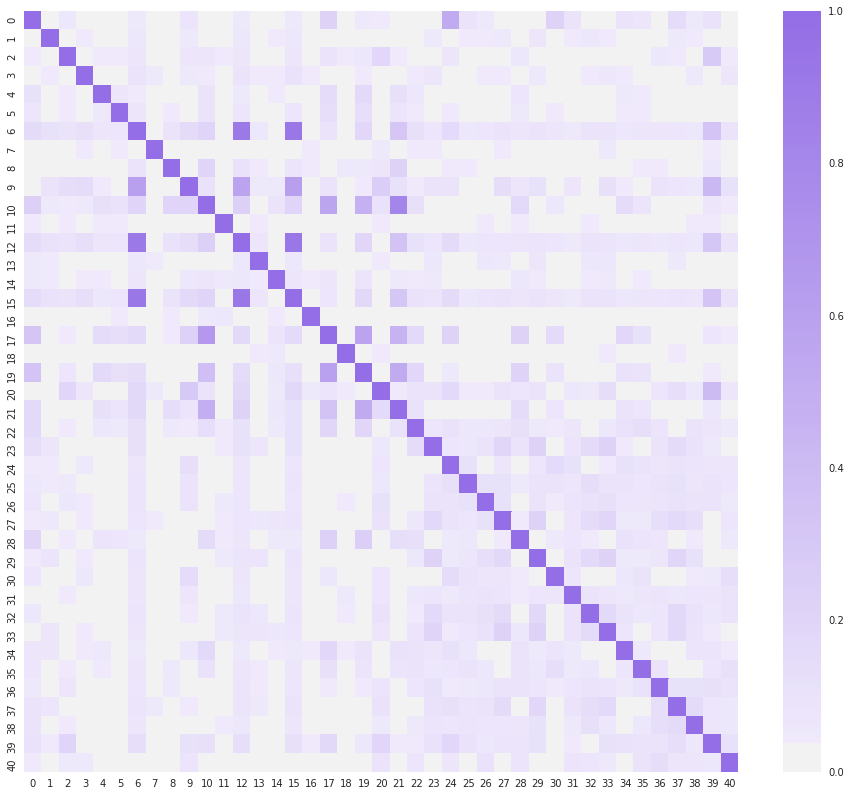

In [63]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(16, 14))
cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)

sns.heatmap(m_max_corr, cmap=cmap, vmax=1, vmin=0, center=0)
plt.show()